In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset=pd.read_csv('datasets_573975_1039955_student-por.csv')

In [4]:
dataset.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


# total number of rows

In [9]:
len(dataset.axes[0])

649

# total number of column

In [10]:
len(dataset.axes[1])

33

In [11]:
dataset.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [27]:
dataset.head(1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11


In [29]:
dataset['Pstatus'].value_counts()

T    569
A     80
Name: Pstatus, dtype: int64

In [32]:
total_col=dataset.columns
    

In [33]:
total_col

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [34]:
cat_list=[]
num_list=dataset._get_numeric_data().columns


In [36]:
num_list

16

In [37]:
for col in total_col:
    if col not in num_list:
        cat_list.append(col)

In [39]:
cat_list

17

In [40]:
label_list=[]
OHE_list=[]


In [41]:
for col in cat_list:
    a=list(dataset[col].value_counts())
    if len(a)>2:
        OHE_list.append(col)
    else:
        label_list.append(col)

In [43]:
label_list

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [44]:
OHE_list

['Mjob', 'Fjob', 'reason', 'guardian']

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for e in label_list:
    dataset[e]=le.fit_transform(dataset[e])

In [46]:
dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,1,1,1,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,1,0,18,1,0,1,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,1,1,17,1,1,1,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [58]:
total_col=list(total_col)

In [59]:
total_col

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [60]:
one_hot_encoding_list=[]
for col in OHE_list:
    one_hot_encoding_list.append(total_col.index(col))

In [61]:
one_hot_encoding_list

[8, 9, 10, 11]

In [65]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [67]:
X[0]

array([0, 0, 18, 1, 0, 0, 4, 4, 'at_home', 'teacher', 'course', 'mother',
       2, 2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 4, 3, 4, 1, 1, 3, 4, 0, 11],
      dtype=object)

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),one_hot_encoding_list)],remainder='passthrough')
X=ct.fit_transform(X)

In [71]:
X[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0,
       0.0, 0.0, 1.0, 0.0, 0, 0, 18, 1, 0, 0, 4, 4, 2, 2, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 4, 3, 4, 1, 1, 3, 4, 0, 11], dtype=object)

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [89]:
X_test[0]

array([0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0,
       0.0, 1.0, 0.0, 0.0, 1, 0, 18, 1, 0, 1, 3, 3, 1, 2, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 5, 3, 4, 1, 1, 5, 0, 10, 10], dtype=object)

In [90]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
c = [0.01,0.1]
gamma = ['scale', 'auto']
epsilon = [0.01,0.01,1]
shrinking = [True,False]
svm_grid = {'kernel':kernel,'C':c,'gamma':gamma,'epsilon':epsilon,'shrinking':shrinking}
svm_search = RandomizedSearchCV(SVR(),svm_grid,cv=3,return_train_score=True,verbose=1)
svm_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   11.7s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.01, 0.1],
                                        'epsilon': [0.01, 0.01, 1],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring=None, verbose=1)

In [91]:
svm_search.best_params_

{'shrinking': True,
 'kernel': 'linear',
 'gamma': 'auto',
 'epsilon': 1,
 'C': 0.01}

In [92]:
svm_search.best_score_

0.8238719777662108

In [93]:
y_pred=svm_search.predict(X_test)

In [94]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [95]:
score

0.874948748688206

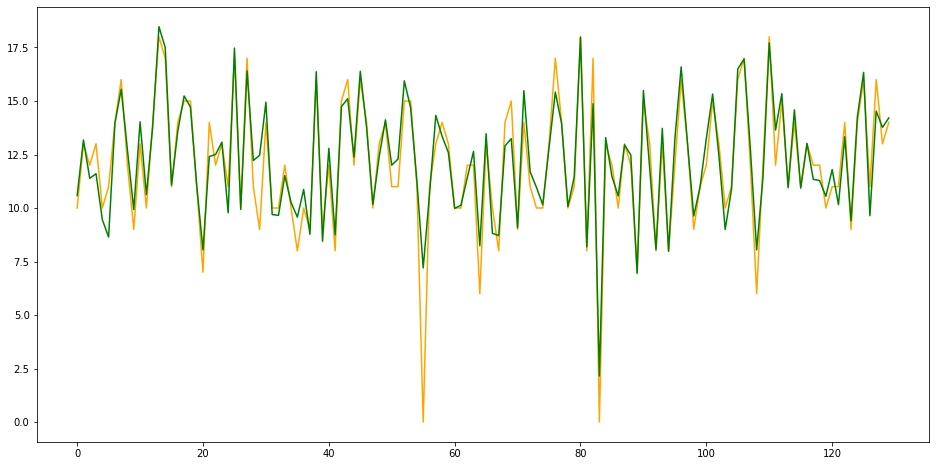

In [103]:
plt.figure(figsize=(16,8))
plt.plot(y_test,color='orange')
plt.plot(y_pred,color='green')